/Users/gdhan/opt/anaconda3/lib/python3.9/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


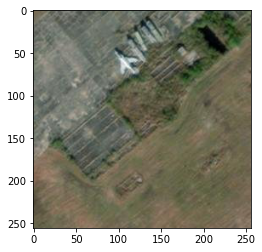

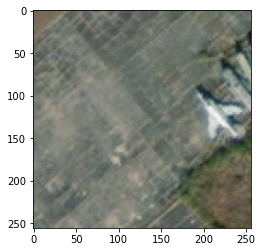

In [16]:
# Import Required packages
import urllib.request
import rasterio
import math
import matplotlib.pyplot as plt

def lat_lng_to_tile(lat, lng, zoom):
    """
    Calculates the x, y, and z values for an Esri satellite tile based on a latitude, longitude, and zoom level.
    """
    x = int((lng + 180) / 360 * (2 ** zoom))
    y = int((1 - math.log(math.tan(lat * math.pi / 180) + 1 / math.cos(lat * math.pi / 180)) / math.pi) / 2 * (2 ** zoom))
    z = zoom
    return x, y, z

# The URL of the Esri satellite tile server
tile_url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'

# A list of locations to retrieve satellite tiles for
locations = [
    [34.50868, -77.55074], # 1 crash site
]

# Iterate over zoom levels, save the image tiles, and plot the images for each location
for zoom in range(18, 20):
    # Iterate over the locations and retrieve the satellite tiles for each location
    for location in locations:
        # Calculate the x, y, and z values for the tile based on the location
        x, y, z = lat_lng_to_tile(location[0], location[1], zoom)

        # Construct the URL of the tile
        tile_url = f'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'

        # Download the tile and save it to a file
        urllib.request.urlretrieve(tile_url, f'{x}_{y}_{z}.jpg')

        # Open the tile file and create a raster dataset from it
        with rasterio.open(f'{x}_{y}_{z}.jpg', 'r') as src:
            raster = src.read()
        
        # Plot the raster dataset
        plt.imshow(raster.transpose([1, 2, 0]))
        plt.show()

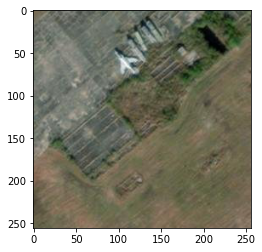

In [10]:
# Iterate over zoom levels
for zoom in range(18, 19):
    # Iterate over the locations and retrieve the satellite tiles for each location
    for location in locations:
        # Calculate the x, y, and z values for the tile based on the location
        x, y, z = lat_lng_to_tile(location[0], location[1], zoom)

        # Construct the URL of the tile
        tile_url = f'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'

        # Download the tile and save it to a file
        urllib.request.urlretrieve(tile_url, f'{x}_{y}_{z}.jpg')

        # Open the tile file and create a raster dataset from it
        with rasterio.open(f'{x}_{y}_{z}.jpg', 'r') as src:
            raster = src.read()

        # Plot the raster dataset
        plt.imshow(raster.transpose([1, 2, 0]))
        plt.show()

In [8]:
first_band = raster[0]
second_band = raster[1]
third_band = raster[2]
print(first_band.shape)
print(raster.shape)


(256, 256)
(3, 256, 256)


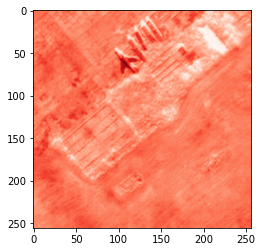

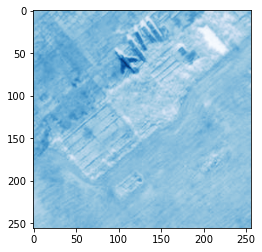

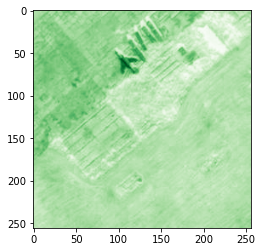

In [3]:
# Display the raster data using Matplotlib
plt.imshow(raster[0], 'Reds')
plt.show()
plt.imshow(raster[1], cmap='Blues')
plt.show()
plt.imshow(raster[2], cmap='Greens')
plt.show()

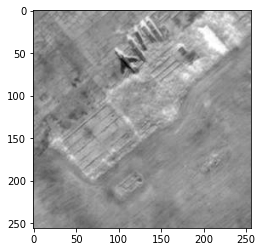

<AxesSubplot:>

In [4]:
import rasterio.plot

rasterio.plot.show(raster[0], cmap='gray_r')